# **1. Import Libraries:**

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
import xgboost as xgb
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# **2. Read the Dataset:**

In [27]:
df= pd.read_csv("/kaggle/input/student-depression-dataset/student_depression_dataset.csv")

# **3. Dataset Overview:**

In [28]:
df.head()

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,'5-6 hours',Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,'5-6 hours',Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,'Less than 5 hours',Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,'7-8 hours',Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,'5-6 hours',Moderate,M.Tech,Yes,1.0,1.0,No,0


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27901 non-null  int64  
 1   Gender                                 27901 non-null  object 
 2   Age                                    27901 non-null  float64
 3   City                                   27901 non-null  object 
 4   Profession                             27901 non-null  object 
 5   Academic Pressure                      27901 non-null  float64
 6   Work Pressure                          27901 non-null  float64
 7   CGPA                                   27901 non-null  float64
 8   Study Satisfaction                     27901 non-null  float64
 9   Job Satisfaction                       27901 non-null  float64
 10  Sleep Duration                         27901 non-null  object 
 11  Di

In [30]:
df.describe()

,id,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Depression
count,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000
mean,70442.149421,25.822300,3.141214,0.000430,7.656104,2.943837,0.000681,7.156984,0.585499
std,40641.175216,4.905687,1.381465,0.043992,1.470707,1.361148,0.044394,3.707642,0.492645
min,2.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,35039.000000,21.000000,2.000000,0.000000,6.290000,2.000000,0.000000,4.000000,0.000000
50%,70684.000000,25.000000,3.000000,0.000000,7.770000,3.000000,0.000000,8.000000,1.000000
75%,105818.000000,30.000000,4.000000,0.000000,8.920000,4.000000,0.000000,10.000000,1.000000
max,140699.000000,59.000000,5.000000,5.000000,10.000000,5.000000,4.000000,12.000000,1.000000


In [31]:
df.shape

(27901, 18)

In [32]:
df.count()

id                                       27901
Gender                                   27901
Age                                      27901
City                                     27901
Profession                               27901
Academic Pressure                        27901
Work Pressure                            27901
CGPA                                     27901
Study Satisfaction                       27901
Job Satisfaction                         27901
Sleep Duration                           27901
Dietary Habits                           27901
Degree                                   27901
Have you ever had suicidal thoughts ?    27901
Work/Study Hours                         27901
Financial Stress                         27901
Family History of Mental Illness         27901
Depression                               27901
dtype: int64

In [33]:
df.dtypes

id                                         int64
Gender                                    object
Age                                      float64
City                                      object
Profession                                object
Academic Pressure                        float64
Work Pressure                            float64
CGPA                                     float64
Study Satisfaction                       float64
Job Satisfaction                         float64
Sleep Duration                            object
Dietary Habits                            object
Degree                                    object
Have you ever had suicidal thoughts ?     object
Work/Study Hours                         float64
Financial Stress                          object
Family History of Mental Illness          object
Depression                                 int64
dtype: object

# **4. Data Preprocessing and Cleaning:**

## Check the duplicate values 

In [34]:
df.duplicated().sum()

0

## Handling Missing Values 

In [35]:
df.isnull().sum()

id                                       0
Gender                                   0
Age                                      0
City                                     0
Profession                               0
Academic Pressure                        0
Work Pressure                            0
CGPA                                     0
Study Satisfaction                       0
Job Satisfaction                         0
Sleep Duration                           0
Dietary Habits                           0
Degree                                   0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         0
Family History of Mental Illness         0
Depression                               0
dtype: int64

# **5. EDA:**

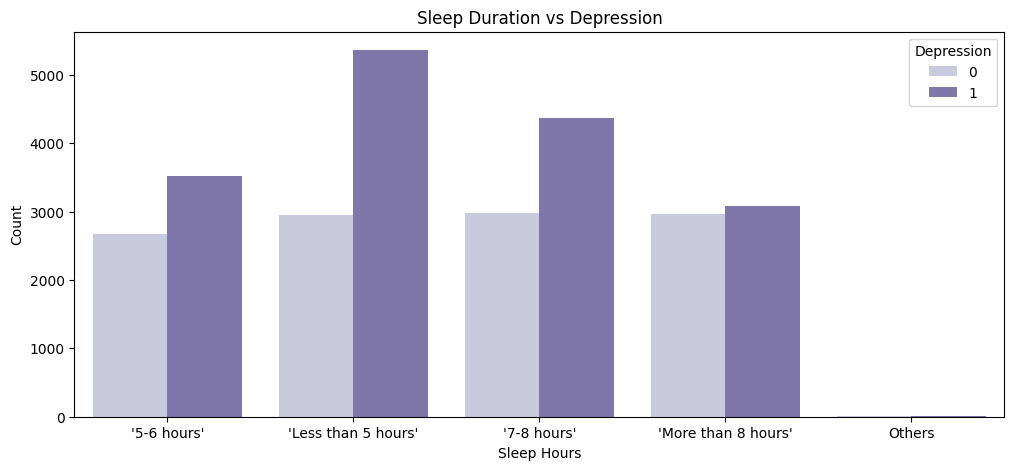

In [36]:
plt.figure(figsize=(12, 5))
sns.countplot(
    x='Sleep Duration',
    hue='Depression',
    data=df,
    palette='Purples'
)
plt.title('Sleep Duration vs Depression')
plt.xlabel('Sleep Hours')
plt.ylabel('Count')
plt.show()


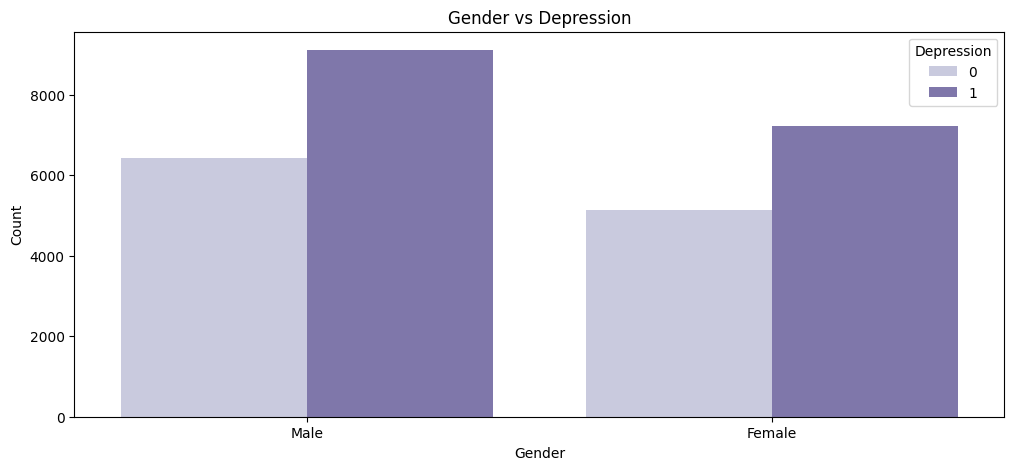

In [37]:
plt.figure(figsize=(12, 5))
sns.countplot(
    x='Gender',
    hue='Depression',
    data=df,
    palette='Purples'
)
plt.title('Gender vs Depression')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


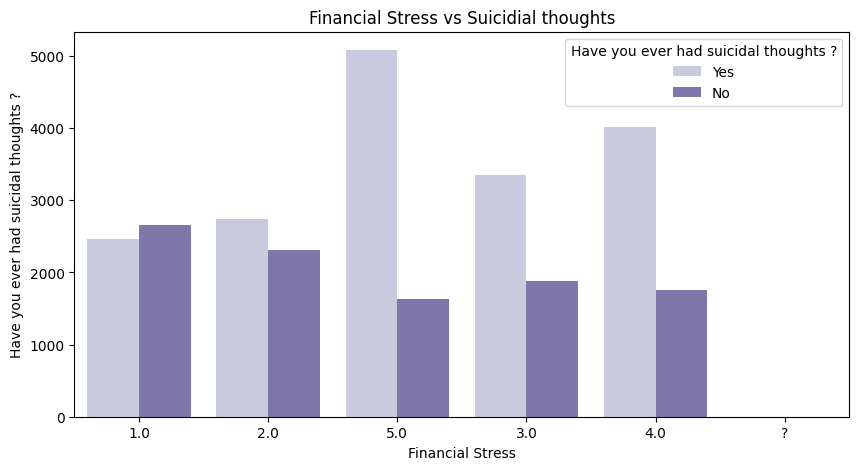

In [38]:
plt.figure(figsize = (10,5))
sns.countplot(x = 'Financial Stress', hue = 'Have you ever had suicidal thoughts ?',data = df, palette='Purples')
plt.title('Financial Stress vs Suicidial thoughts')
plt.xlabel('Financial Stress')
plt.ylabel('Have you ever had suicidal thoughts ?')
plt.show()

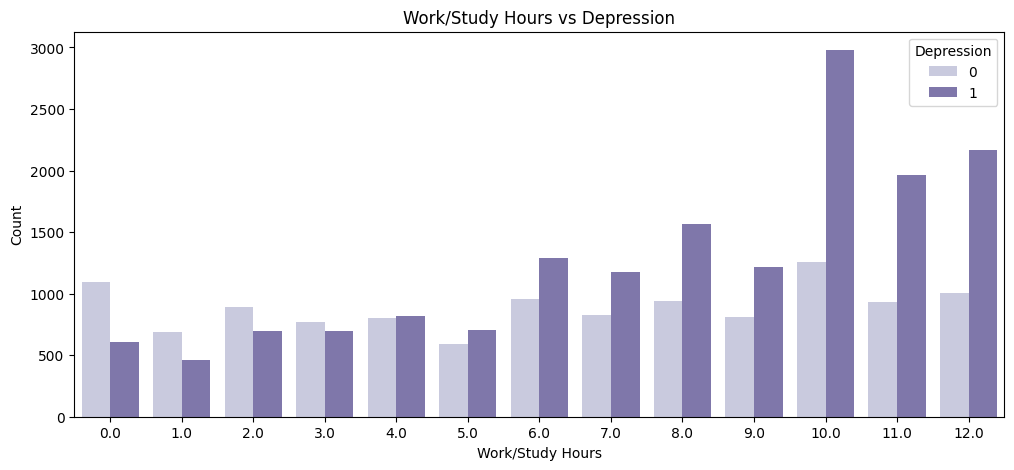

In [39]:
plt.figure(figsize=(12, 5))
sns.countplot(
    x='Work/Study Hours',
    hue='Depression',
    data=df,
    palette='Purples'
)
plt.title('Work/Study Hours vs Depression')
plt.xlabel('Work/Study Hours')
plt.ylabel('Count')
plt.show()


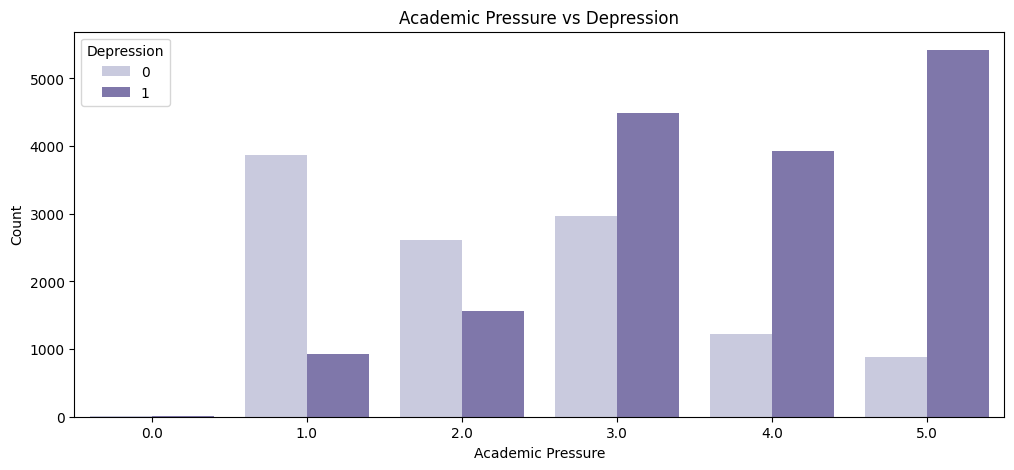

In [40]:
plt.figure(figsize=(12, 5))
sns.countplot(
    x='Academic Pressure',
    hue='Depression',
    data=df,
    palette='Purples'
)
plt.title('Academic Pressure vs Depression')
plt.xlabel('Academic Pressure')
plt.ylabel('Count')
plt.show()

## Outlier Detection 

<Axes: xlabel='Age'>

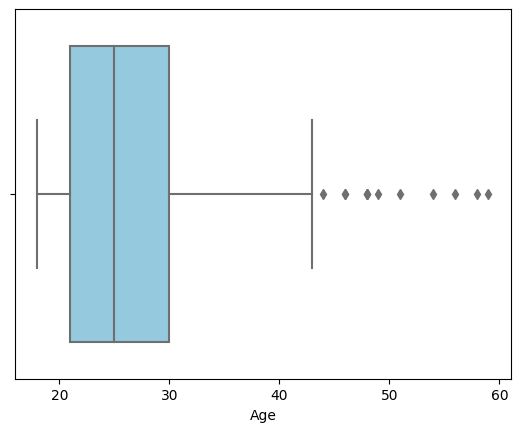

In [41]:
sns.boxplot(x=df['Age'], color='skyblue')


<Axes: xlabel='Academic Pressure'>

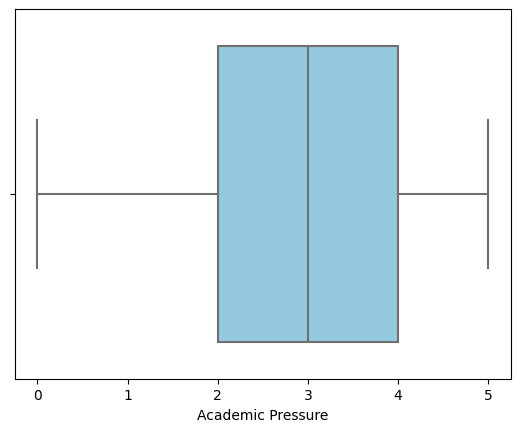

In [42]:
sns.boxplot(x=df['Academic Pressure'], color='skyblue')


## Drop Columns 

In [43]:
df['Total Pressure'] = df['Academic Pressure'] + df['Work Pressure']

df = df.drop(['Academic Pressure', 'Work Pressure'], axis=1)

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

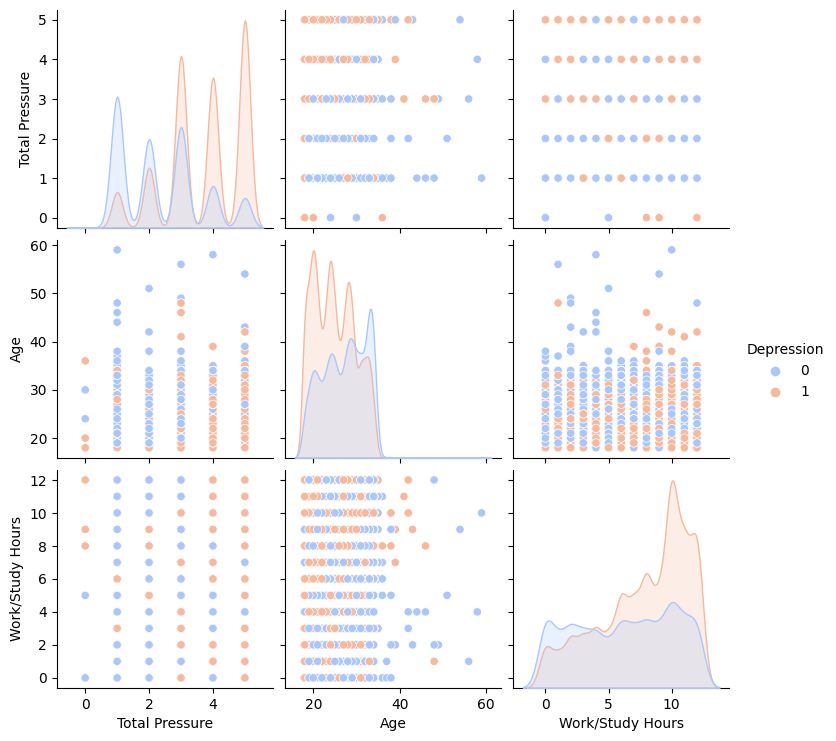

In [44]:
selected_features = ['Total Pressure', 'Age', 'Work/Study Hours','Family History of Mental Illness','Depression']
sns.pairplot(df[selected_features], hue= 'Depression',palette = 'purples')
plt.show()

In [47]:
df = df.drop(columns = ['id'])

# **6. Label Encoding:** 

In [48]:
label_encoders = {}
categorical_columns  = df.select_dtypes(include=['object']).columns
for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# **7. Train/Test Split:**

In [49]:
X = df.drop(columns=['Depression'])  
y = df['Depression']  


scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [50]:
X_train.shape


(22320, 15)

In [51]:
X_test.shape

(5581, 15)

# **8. Import Models:**

In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier
from xgboost import XGBClassifier

# **9. Models Definition:**

In [53]:
models = {
    "Logistic Regression": LogisticRegression(C=1.0, max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=200, max_depth=10, random_state=42),
    "Support Vector Machine": SVC(kernel='rbf', C=1.0),
    "Decision Tree": DecisionTreeClassifier(max_depth=10, min_samples_split=5),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=10),
    "Naive Bayes": GaussianNB(),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=200, learning_rate=0.1),
    "AdaBoost": AdaBoostClassifier(n_estimators=100, learning_rate=0.5),
    "Bagging Classifier": BaggingClassifier(n_estimators=100),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', n_estimators=200)
}

# **10. Model Training:**

In [54]:
results = {}

for name, model in models.items():
    model.fit(X_train, y_train)  # Train
    y_pred = model.predict(X_test)  # Predict
    accuracy = accuracy_score(y_test, y_pred)  # Accuracy
    results[name] = accuracy  # Store accuracy
    print(f"{name} Accuracy: {accuracy:.4f}")
    print(classification_report(y_test, y_pred))
    print("-" * 50)

Logistic Regression Accuracy: 0.8364
              precision    recall  f1-score   support

           0       0.82      0.79      0.80      2343
           1       0.85      0.87      0.86      3238

    accuracy                           0.84      5581
   macro avg       0.83      0.83      0.83      5581
weighted avg       0.84      0.84      0.84      5581

--------------------------------------------------
Random Forest Accuracy: 0.8319
              precision    recall  f1-score   support

           0       0.82      0.78      0.79      2343
           1       0.84      0.87      0.86      3238

    accuracy                           0.83      5581
   macro avg       0.83      0.82      0.83      5581
weighted avg       0.83      0.83      0.83      5581

--------------------------------------------------
Support Vector Machine Accuracy: 0.8344
              precision    recall  f1-score   support

           0       0.82      0.77      0.80      2343
           1       0.84    

# **11. Confusion Matrix:** 


Logistic Regression Accuracy: 0.8364
              precision    recall  f1-score   support

           0       0.82      0.79      0.80      2343
           1       0.85      0.87      0.86      3238

    accuracy                           0.84      5581
   macro avg       0.83      0.83      0.83      5581
weighted avg       0.84      0.84      0.84      5581



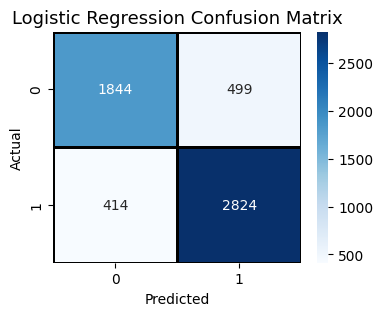

------------------------------------------------------------

Random Forest Accuracy: 0.8319
              precision    recall  f1-score   support

           0       0.82      0.78      0.79      2343
           1       0.84      0.87      0.86      3238

    accuracy                           0.83      5581
   macro avg       0.83      0.82      0.83      5581
weighted avg       0.83      0.83      0.83      5581



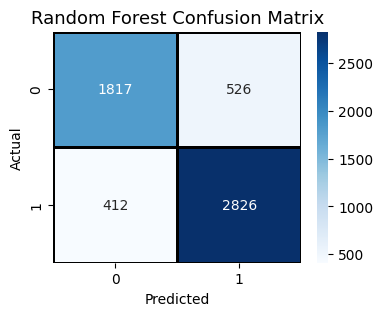

------------------------------------------------------------

Support Vector Machine Accuracy: 0.8344
              precision    recall  f1-score   support

           0       0.82      0.77      0.80      2343
           1       0.84      0.88      0.86      3238

    accuracy                           0.83      5581
   macro avg       0.83      0.83      0.83      5581
weighted avg       0.83      0.83      0.83      5581



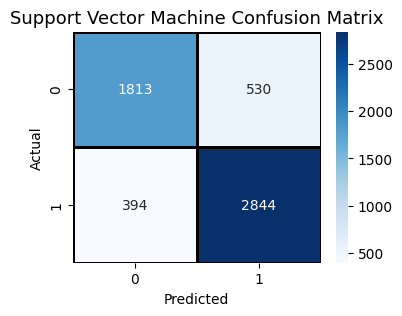

------------------------------------------------------------

Decision Tree Accuracy: 0.8042
              precision    recall  f1-score   support

           0       0.78      0.75      0.76      2343
           1       0.82      0.84      0.83      3238

    accuracy                           0.80      5581
   macro avg       0.80      0.80      0.80      5581
weighted avg       0.80      0.80      0.80      5581



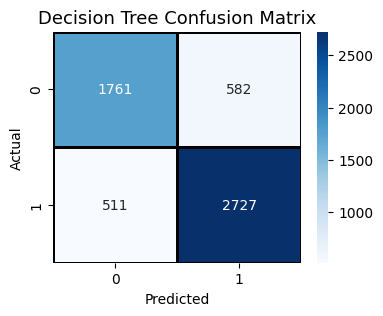

------------------------------------------------------------

K-Nearest Neighbors Accuracy: 0.8169
              precision    recall  f1-score   support

           0       0.79      0.77      0.78      2343
           1       0.84      0.85      0.84      3238

    accuracy                           0.82      5581
   macro avg       0.81      0.81      0.81      5581
weighted avg       0.82      0.82      0.82      5581



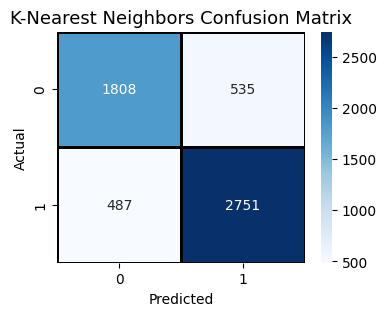

------------------------------------------------------------

Naive Bayes Accuracy: 0.8212
              precision    recall  f1-score   support

           0       0.76      0.84      0.80      2343
           1       0.88      0.81      0.84      3238

    accuracy                           0.82      5581
   macro avg       0.82      0.82      0.82      5581
weighted avg       0.83      0.82      0.82      5581



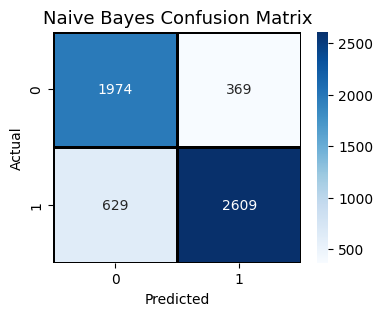

------------------------------------------------------------

Gradient Boosting Accuracy: 0.8375
              precision    recall  f1-score   support

           0       0.82      0.79      0.80      2343
           1       0.85      0.88      0.86      3238

    accuracy                           0.84      5581
   macro avg       0.83      0.83      0.83      5581
weighted avg       0.84      0.84      0.84      5581



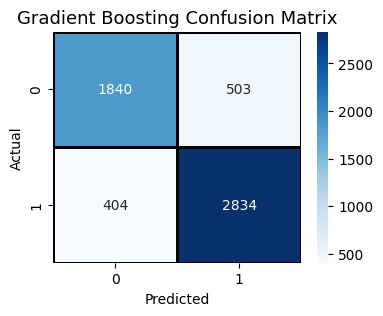

------------------------------------------------------------

AdaBoost Accuracy: 0.8389
              precision    recall  f1-score   support

           0       0.83      0.78      0.80      2343
           1       0.85      0.88      0.86      3238

    accuracy                           0.84      5581
   macro avg       0.84      0.83      0.83      5581
weighted avg       0.84      0.84      0.84      5581



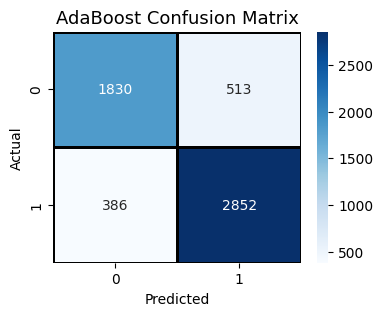

------------------------------------------------------------

Bagging Classifier Accuracy: 0.8210
              precision    recall  f1-score   support

           0       0.79      0.77      0.78      2343
           1       0.84      0.85      0.85      3238

    accuracy                           0.82      5581
   macro avg       0.82      0.81      0.82      5581
weighted avg       0.82      0.82      0.82      5581



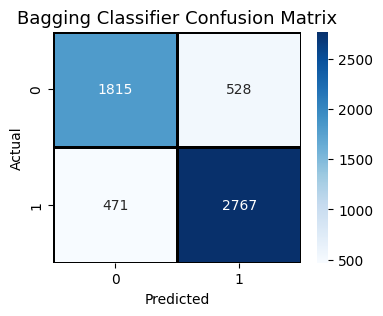

------------------------------------------------------------

XGBoost Accuracy: 0.8208
              precision    recall  f1-score   support

           0       0.79      0.77      0.78      2343
           1       0.84      0.86      0.85      3238

    accuracy                           0.82      5581
   macro avg       0.82      0.81      0.82      5581
weighted avg       0.82      0.82      0.82      5581



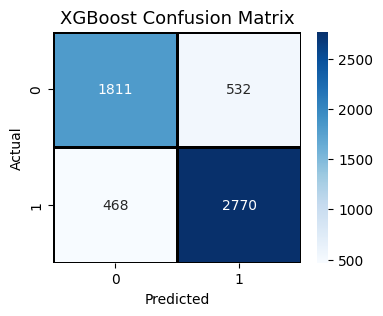

------------------------------------------------------------


In [55]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

for name, model in models.items():
    # Train model
    model.fit(X_train, y_train)
    
    # Predict
    y_pred = model.predict(X_test)
    
    # Accuracy
    accuracy = accuracy_score(y_test, y_pred)
    
    print(f"\n{name} Accuracy: {accuracy:.4f}")
    print(classification_report(y_test, y_pred))
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    
    plt.figure(figsize=(4, 3))
    sns.heatmap(
        cm,
        annot=True,
        fmt="d",
        cmap="Blues",
        linewidths=2,
        linecolor="k"
    )
    
    plt.title(f"{name} Confusion Matrix", fontsize=13)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()
    
    print("-" * 60)


# **12. Model Perofrmance Comparison:**

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


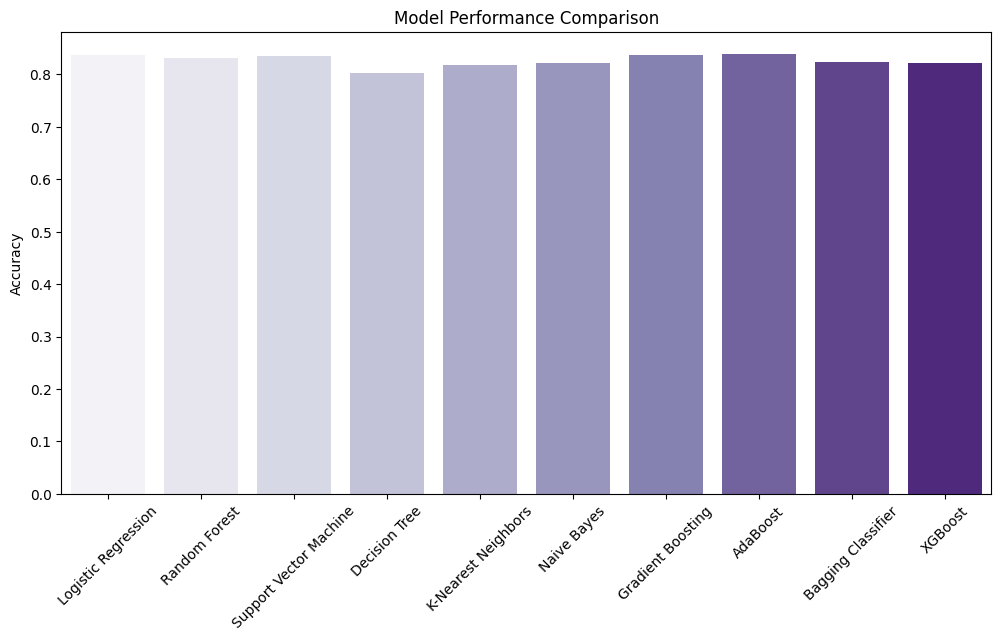

In [57]:
plt.figure(figsize=(12, 6))
sns.barplot(x=list(results.keys()), y=list(results.values()), palette="Purples")
plt.xticks(rotation=45)
plt.ylabel("Accuracy")
plt.title("Model Performance Comparison")
plt.show()

# **13. Saving Model:**

In [59]:
import joblib
import os

In [60]:
os.makedirs("saved_models", exist_ok=True)


In [64]:
import joblib
import os

# Create folder once
os.makedirs("saved_models", exist_ok=True)

for name, model in models.items():
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)


    # SAVE MODEL
    model_filename = f"saved_models/{name.replace(' ', '_')}.joblib"
    joblib.dump(model, model_filename)

    print(f"Model saved as: {model_filename}")
    print("-" * 60)

    


Model saved as: saved_models/Logistic_Regression.joblib
------------------------------------------------------------
Model saved as: saved_models/Random_Forest.joblib
------------------------------------------------------------
Model saved as: saved_models/Support_Vector_Machine.joblib
------------------------------------------------------------
Model saved as: saved_models/Decision_Tree.joblib
------------------------------------------------------------
Model saved as: saved_models/K-Nearest_Neighbors.joblib
------------------------------------------------------------
Model saved as: saved_models/Naive_Bayes.joblib
------------------------------------------------------------
Model saved as: saved_models/Gradient_Boosting.joblib
------------------------------------------------------------
Model saved as: saved_models/AdaBoost.joblib
------------------------------------------------------------
Model saved as: saved_models/Bagging_Classifier.joblib
---------------------------------------